# Course 4: Troubleshooting and Debugging Techniques

> When debugging a problem, we want to consider the simplest explanations first and avoid jumping into complex or time-consuming solutions unless we really have to.

>Remember to always have a clear picture of what the problem is before you start solving it. 

## Week 1: Introduction to Debugging


* **Troubleshooting** is the process of identifying, analyzing and solving problems.
* **Debugging** is the process of identifying, analysing and removing bugs in a system.
* **Debuggers** let us follow the code line by line, inspect changes in variable assignments, interrupt the program when a specific condition is met and more.

### Problem solving steps:

1. Getting information

        Get as much information as you need for the current state of things. Use the documentation.
        Reproduction case: A clear description of how and when the problem appears
        The reproduction case is very important information for solving a problem.

2. Finding the root cause

        Get to the bottom of what's going on and find out what triggered the problem.
        
3. Performing the necessary remediation

        Fix the problem short term to fix the code and get the pipeline running.
        Fix the problem long term so the error doesn't happen again.

* Reminder:
       
       Throughout the whole process, it's important that we document what we do. 
       Note down the info that we get, the different things we tested to try, and figure out the root cause. 
       Finally, the steps we took to fix the issue.
       
**strace** is a command line tool that will trace a systems calls made by the program and tell us the result of each of these calls was.

**ltrace** is used to look at library calls made by the software.

Example command:

```bash
strace ./purplebox.py # Outputs the system calls to terminal
strace -o failure.strace ./purplebox.py # Outputs the system calls to failure.strace file
less failure.strace # Scroll through the file with less

# You can also use piping
strace ./purplebox.py | less # Scroll through the system calls
```

**System calls** are calls the programs running on our computer make to the running kernel.

### Problem solving questions

* What were you trying to do?
* What steps did you follow?
* What was the expected result?
* What was the actual result?

The **load average** on Linux shows how much time a processor is busy in a given minute, with one meaning it was busy for the whole minute. So normally <i><u>this number shouldn't be above the amount of processors in the computer</u></i>. 

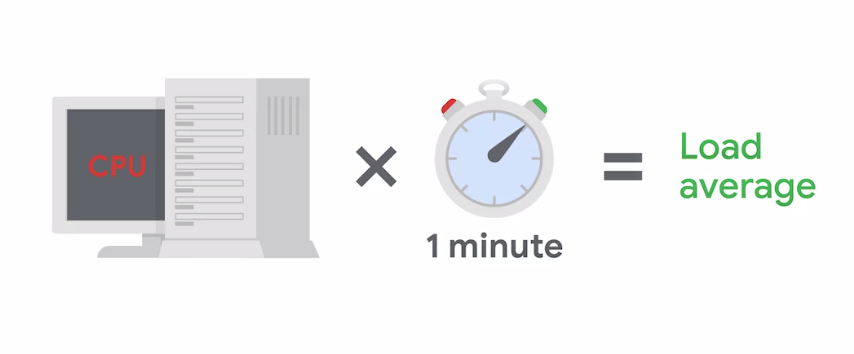

```bash
kill -STOP # stop the backup system in the video example
```

**Reproduction case**: a way to verify if the problem is present or not